In [97]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as data
import yfinance as yf
import datetime as dt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


plt.style.use('fivethirtyeight')
%matplotlib inline

## Downlad the data from yfinance

In [98]:
stock = 'POWERGRID.NS'
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 1, 1)

df = yf.download(stock, start, end)

/tmp/ipykernel_1816674/1826263101.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [99]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.385574,35.250700,26.767997,28.908793,855215656
2007-10-08,30.727665,33.480117,30.534510,33.480117,126671715
2007-10-09,32.820179,33.109910,29.085858,30.743766,116725709
2007-10-10,33.126007,33.802049,32.836276,33.673278,67931378
2007-10-11,36.828129,38.630905,32.836270,38.630905,106320954


In [100]:
df.columns

MultiIndex([( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [101]:
df.shape

(4248, 5)

In [102]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4248.000000,4248.000000,4248.000000,4248.000000,4.248000e+03
mean,81.508973,82.564207,80.464993,81.545986,1.190345e+07
std,67.414034,68.196283,66.581218,67.397150,2.053303e+07
min,18.908411,20.212439,16.952369,20.114637,0.000000e+00
25%,36.399825,36.958530,35.852577,36.467492,4.816756e+06
50%,56.399294,56.998543,55.606445,56.279684,8.394767e+06
75%,83.413801,84.683710,82.517291,83.501938,1.369354e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4248 entries, 2007-10-05 to 2024-12-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4248 non-null   float64
 1   (High, POWERGRID.NS)    4248 non-null   float64
 2   (Low, POWERGRID.NS)     4248 non-null   float64
 3   (Open, POWERGRID.NS)    4248 non-null   float64
 4   (Volume, POWERGRID.NS)  4248 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 199.1 KB


In [104]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [105]:
df = df.reset_index()

In [106]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.385574,35.250700,26.767997,28.908793,855215656
1,2007-10-08,30.727665,33.480117,30.534510,33.480117,126671715
2,2007-10-09,32.820179,33.109910,29.085858,30.743766,116725709
3,2007-10-10,33.126007,33.802049,32.836276,33.673278,67931378
4,2007-10-11,36.828129,38.630905,32.836270,38.630905,106320954


In [107]:
df.columns = [col[1] if isinstance(col, tuple) else col for col in df.columns]
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])


In [108]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2007-10-05,32.385574,35.250700,26.767997,28.908793,855215656
1,2007-10-08,30.727665,33.480117,30.534510,33.480117,126671715
2,2007-10-09,32.820179,33.109910,29.085858,30.743766,116725709
3,2007-10-10,33.126007,33.802049,32.836276,33.673278,67931378
4,2007-10-11,36.828129,38.630905,32.836270,38.630905,106320954


In [109]:
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])


fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [110]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [111]:
df.drop(columns=['Date'],inplace=True)

In [112]:
df.head()

,Close,High,Low,Open,Volume
0,32.385574,35.250700,26.767997,28.908793,855215656
1,30.727665,33.480117,30.534510,33.480117,126671715
2,32.820179,33.109910,29.085858,30.743766,116725709
3,33.126007,33.802049,32.836276,33.673278,67931378
4,36.828129,38.630905,32.836270,38.630905,106320954


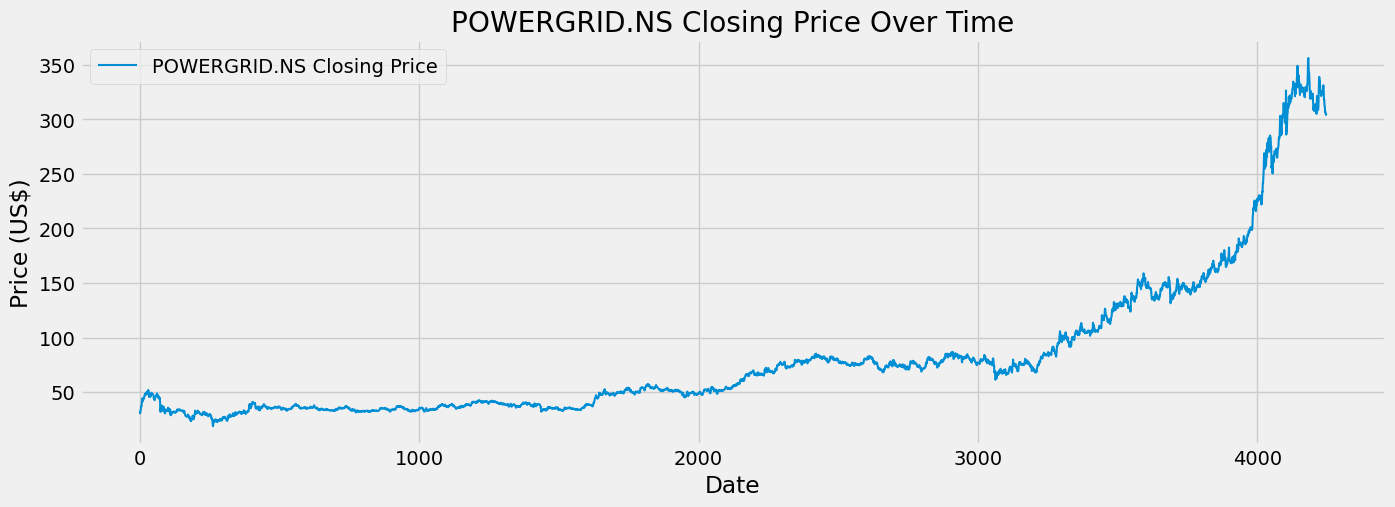

In [113]:
plt.figure(figsize=(15,5))
plt.plot(df.Close,label=f'{stock} Closing Price',linewidth=1.5)
plt.title(f'{stock} Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (US$)')
plt.legend()
plt.show()

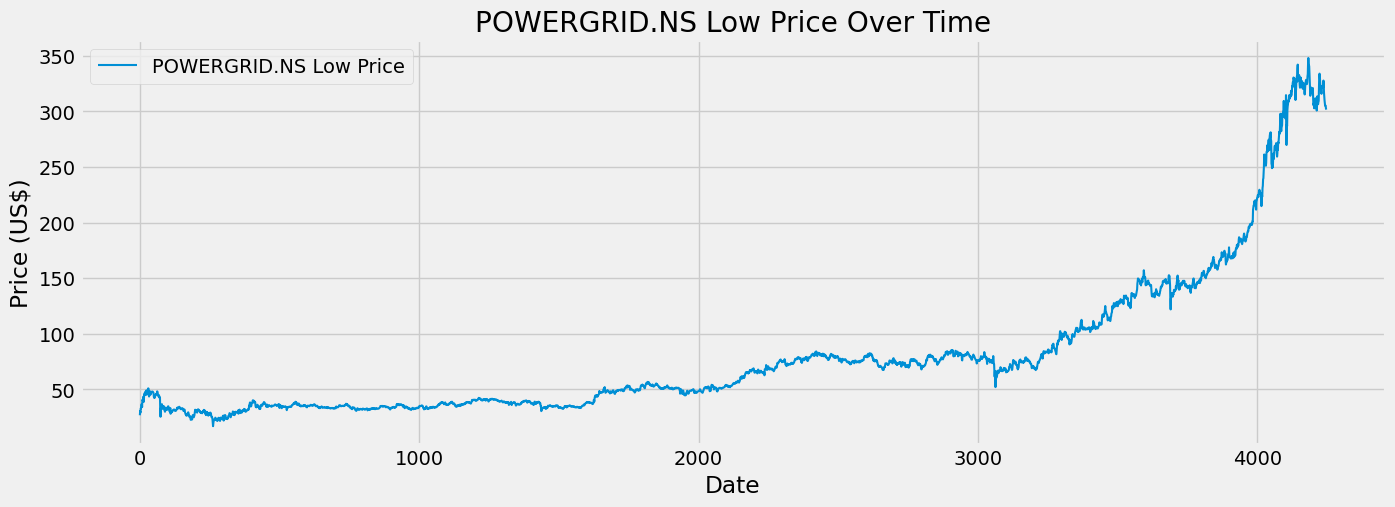

In [114]:
plt.figure(figsize=(15,5))
plt.plot(df.Low,label=f'{stock} Low Price',linewidth=1.5)
plt.title(f'{stock} Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (US$)')
plt.legend()
plt.show()

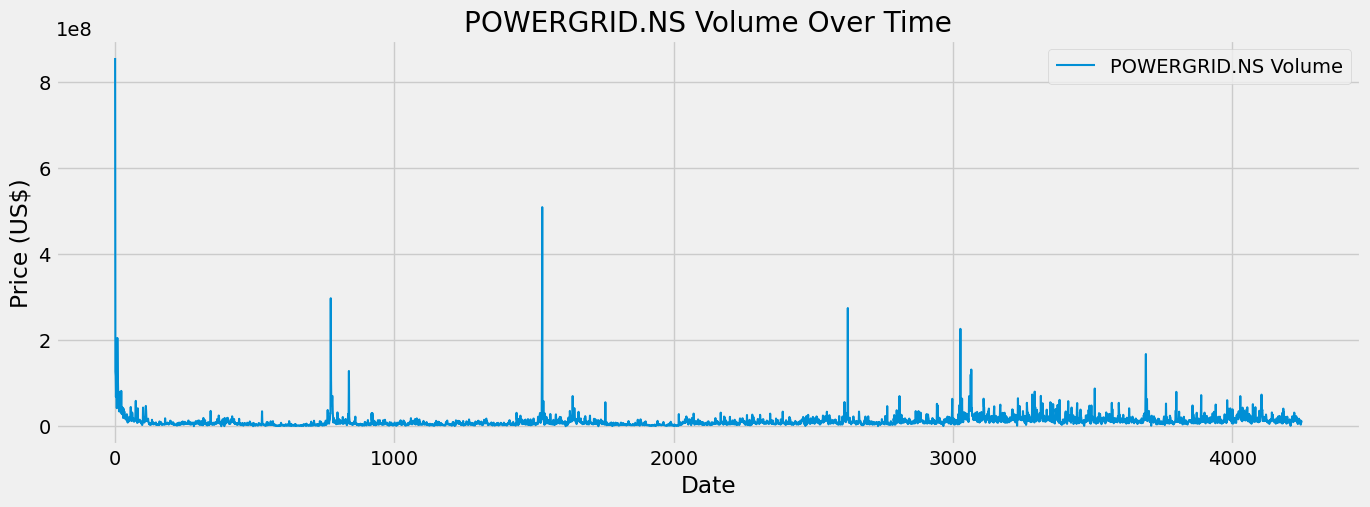

In [115]:
plt.figure(figsize=(15,5))
plt.plot(df.Volume,label=f'{stock} Volume',linewidth=1.5)
plt.title(f'{stock} Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Price (US$)')
plt.legend()
plt.show()

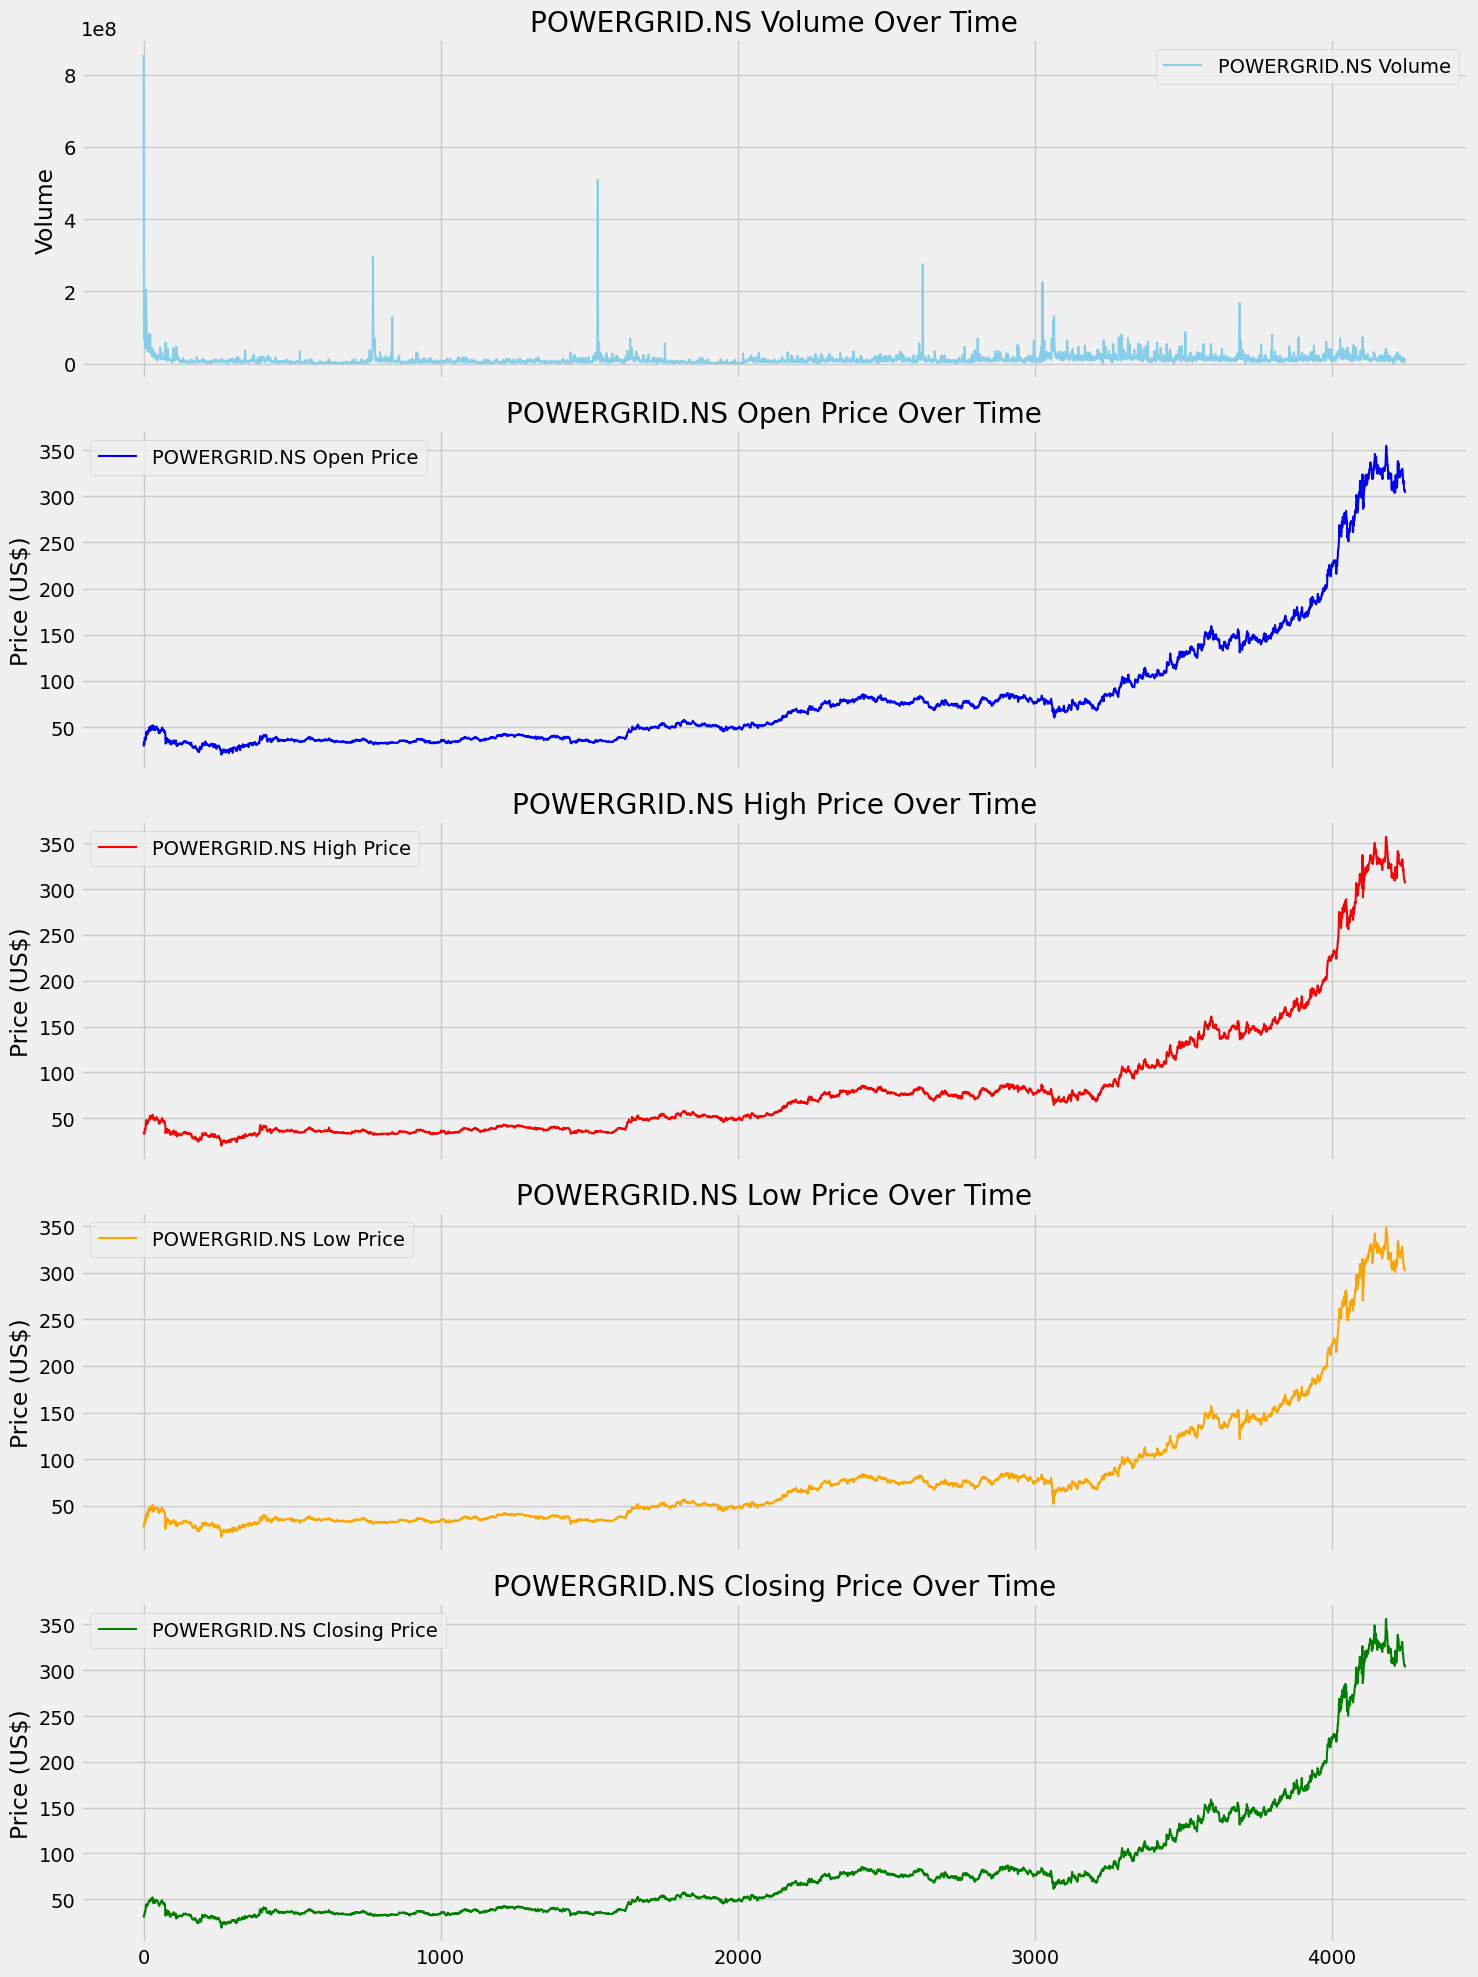

In [116]:
import matplotlib.pyplot as plt

# Create a figure with 5 subplots (5 rows, 1 column)
fig, axs = plt.subplots(5, 1, figsize=(15, 20), sharex=True)

# Plot 1: Volume
axs[0].plot(df['Volume'], label=f'{stock} Volume', linewidth=1.5, color='skyblue')
axs[0].set_title(f'{stock} Volume Over Time')
axs[0].set_ylabel('Volume')
axs[0].legend()

# Plot 2: Open Price
axs[1].plot(df['Open'], label=f'{stock} Open Price', linewidth=1.5, color='blue')
axs[1].set_title(f'{stock} Open Price Over Time')
axs[1].set_ylabel('Price (US$)')
axs[1].legend()

# Plot 3: High Price
axs[2].plot(df['High'], label=f'{stock} High Price', linewidth=1.5, color='red')
axs[2].set_title(f'{stock} High Price Over Time')
axs[2].set_ylabel('Price (US$)')
axs[2].legend()

# Plot 4: Low Price
axs[3].plot(df['Low'], label=f'{stock} Low Price', linewidth=1.5, color='orange')
axs[3].set_title(f'{stock} Low Price Over Time')
axs[3].set_ylabel('Price (US$)')
axs[3].legend()

# Plot 5: Close Price
axs[4].plot(df['Close'], label=f'{stock} Closing Price', linewidth=1.5, color='green')
axs[4].set_title(f'{stock} Closing Price Over Time')
axs[4].set_ylabel('Price (US$)')
axs[4].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## Add 100-day , 200-day moving average

In [117]:
df['MA100'] = df['Close'].rolling(window=100).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
df['EMA100'] = df['Close'].ewm(span=100, adjust=False).mean()
df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()

In [118]:
df.head()

,Close,High,Low,Open,Volume,MA100,MA200,EMA100,EMA200
0,32.385574,35.250700,26.767997,28.908793,855215656,NaN,NaN,32.385574,32.385574
1,30.727665,33.480117,30.534510,33.480117,126671715,NaN,NaN,32.352744,32.369078
2,32.820179,33.109910,29.085858,30.743766,116725709,NaN,NaN,32.362001,32.373566
3,33.126007,33.802049,32.836276,33.673278,67931378,NaN,NaN,32.377129,32.381053
4,36.828129,38.630905,32.836270,38.630905,106320954,NaN,NaN,32.465268,32.425303


In [119]:
df.isnull().sum()

Close       0
High        0
Low         0
Open        0
Volume      0
MA100      99
MA200     199
EMA100      0
EMA200      0
dtype: int64

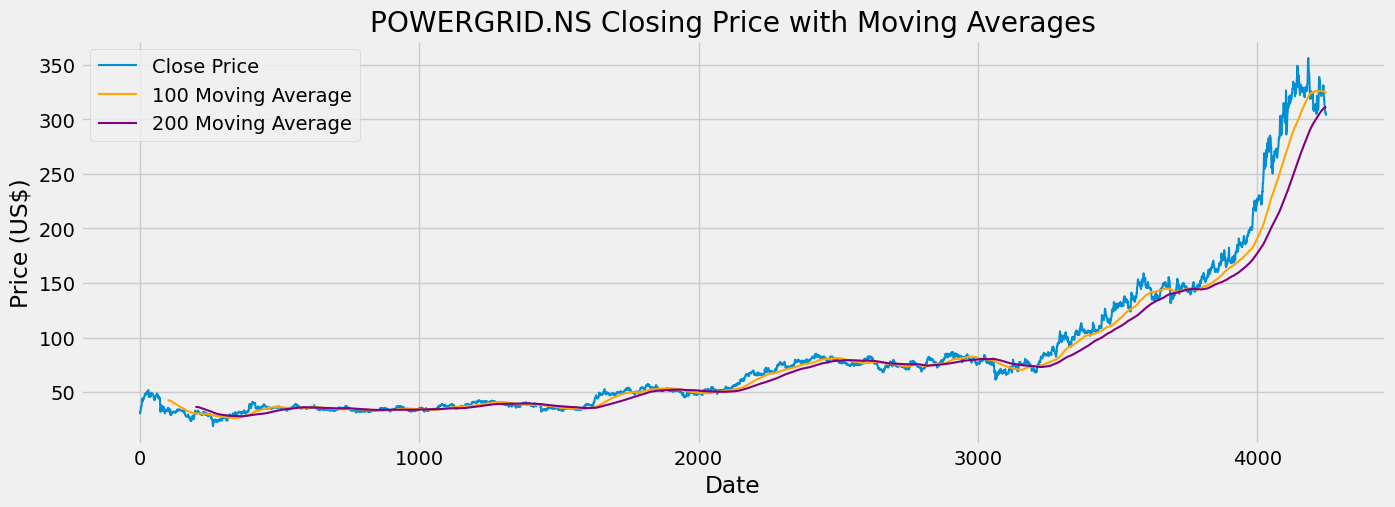

In [120]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'], label='Close Price', linewidth=1.5)
plt.plot(df['MA100'], label='100 Moving Average', linewidth=1.5, color='orange')
plt.plot(df['MA200'], label='200 Moving Average', linewidth=1.5, color='purple')
plt.title(f'{stock} Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (US$)')
plt.legend()
plt.show()

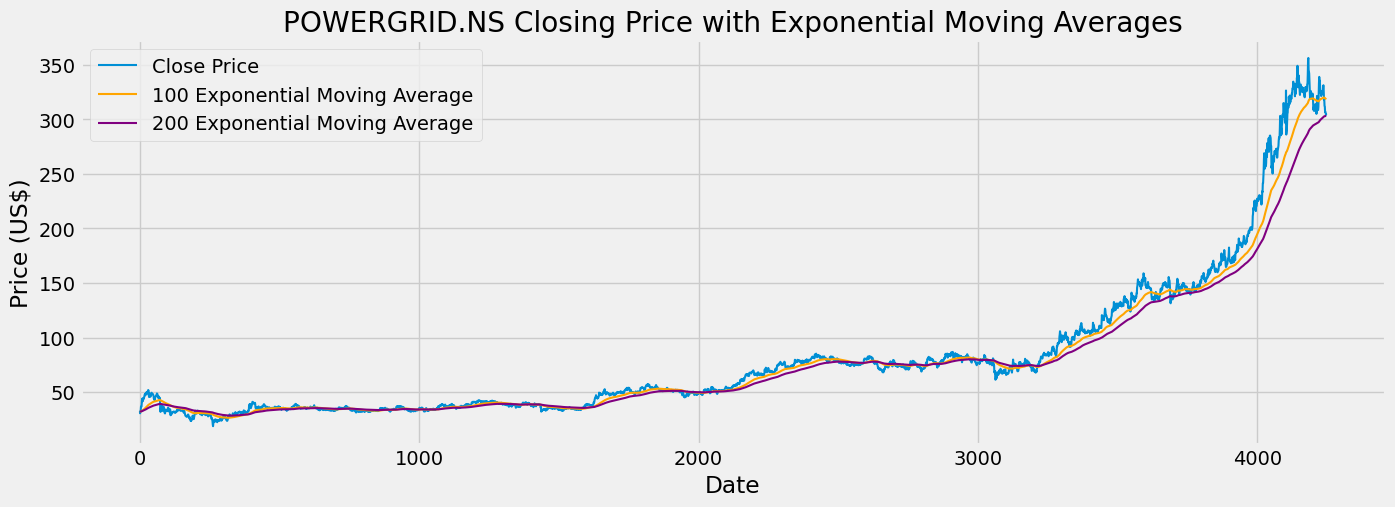

In [121]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'], label='Close Price', linewidth=1.5)
plt.plot(df['EMA100'], label='100 Exponential Moving Average', linewidth=1.5, color='orange')
plt.plot(df['EMA200'], label='200 Exponential Moving Average', linewidth=1.5, color='purple')
plt.title(f'{stock} Closing Price with Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (US$)')
plt.legend()
plt.show()

# Training and Testing

In [122]:
data_train = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_test = pd.DataFrame(df.Close[int(len(df)*0.7):])

In [123]:
data_train.shape, data_test.shape

((2973, 1), (1275, 1))

In [124]:
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_train)

In [125]:
data_training_array.shape[0]

2973

In [126]:
X_train = []
y_train = []


In [127]:
for i in range(100,data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i])

X_train,y_train = np.array(X_train),np.array(y_train)
X_train.shape, y_train.shape

((2873, 100, 1), (2873, 1))

In [128]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam



In [129]:
optimizer = Adam(learning_rate=0.001)

In [130]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


/home/chanupa/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [131]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
model.compile(optimizer = optimizer, loss = 'mean_squared_error')

In [133]:
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True 
)


In [134]:
# List physical devices
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("GPU Details:", tf.config.list_physical_devices('GPU'))

# Check TensorFlow device placement
print("Running on:", tf.test.gpu_device_name())

Num GPUs Available: 1
GPU Details: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Running on: /device:GPU:0


I0000 00:00:1752508470.077813 1816674 gpu_device.cc:2019] Created device /device:GPU:0 with 4128 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [135]:
model.fit(X_train, y_train, epochs = 100, callbacks=[early_stopping])

Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 168ms/step - loss: 0.0926
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0095
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0070
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0076
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0058
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0062
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0054
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0066
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 0.0050
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0056
Epoch 11/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0049
Epoch 12/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 24s 272ms/step - loss: 0.0046
Epoch 13/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 330ms/step - loss: 0.0041
Epoch 14/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 329ms/step - loss: 0.0039
Epoch 15/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 328ms

In [137]:
past_100_days = data_train.tail(100)
final_test_data = pd.concat([past_100_days, data_test], ignore_index=True)

In [138]:
input_data = scaler.transform(final_test_data)

In [139]:
X_test = []
y_test = []

In [140]:
for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i])

X_test,y_test = np.array(X_test),np.array(y_test)

In [141]:
y_predict=model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step


In [145]:
scaler.scale_

array([0.0146979])

In [147]:
scaler_factor = 1 / 0.0146979
y_predict = y_predict * scaler_factor
y_test = y_test * scaler_factor

In [142]:
# Reshape y_test before inverse_transform
y_test_scaled = y_test.reshape(-1, 1)
y_predict_scaled = y_predict

# Inverse transform both
y_test_actual = scaler.inverse_transform(y_test_scaled)
y_predict_actual = scaler.inverse_transform(y_predict_scaled)


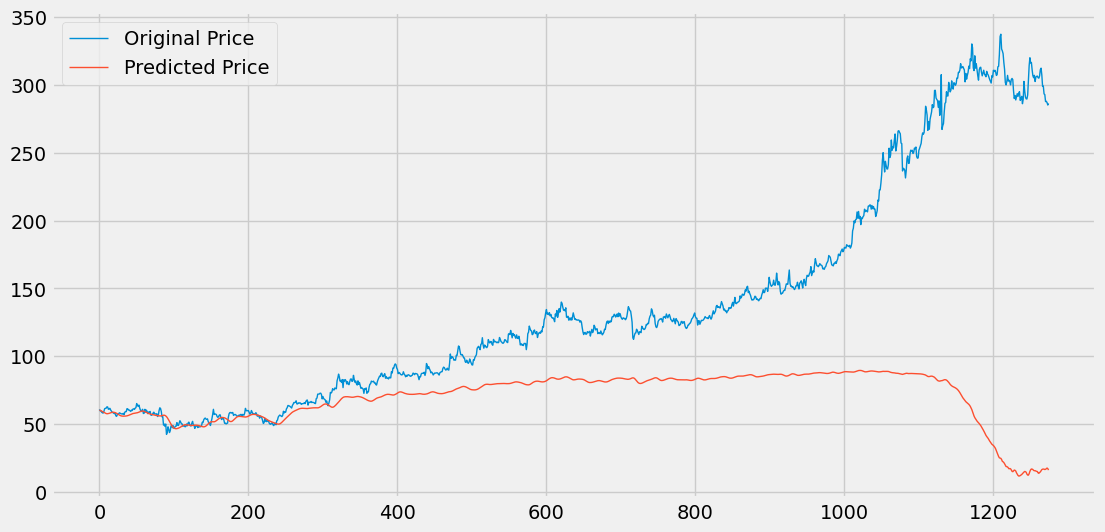

In [149]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predict, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()


In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_actual, y_predict_actual)
mae = mean_absolute_error(y_test_actual, y_predict_actual)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")


MAE: 67.4401
MSE: 11475.7540
